## Can I create a model to forcast some things?

In [20]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics 
from sklearn.model_selection import train_test_split 


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [21]:
data = pd.read_csv('Cobify_data_cleaned.csv') #Upload my clean data
data.head()

,distance,consume,temp_inside,temp_outside,gas_type,ac,rain,sun,temp_diff,fuel_used,cost_of_trip,speed_in_hours,avg_speed
0,28.0,5.0,21.5,12,E10,0,0,0,9.5,1.4000,2.115,0.433333,64.615385
1,12.0,4.2,21.5,13,E10,0,0,0,8.5,0.5040,0.762,0.500000,24.000000
2,11.2,5.5,21.5,15,E10,0,0,0,6.5,0.6160,0.931,0.633333,17.684211
3,12.9,3.9,21.5,14,E10,0,0,0,7.5,0.5031,0.760,0.600000,21.500000
4,18.5,4.5,21.5,15,E10,0,0,0,6.5,0.8325,1.258,0.766667,24.130435


In [22]:
correlations = data.corr()
correlations

,distance,consume,temp_inside,temp_outside,ac,rain,sun,temp_diff,fuel_used,cost_of_trip,speed_in_hours,avg_speed
distance,1.000000,-0.128967,0.075178,0.088175,-0.025738,-0.019791,0.081120,-0.080869,0.992101,0.990355,0.562299,0.884942
consume,-0.128967,1.000000,-0.160623,-0.320811,0.096591,0.248118,-0.170667,0.310991,-0.052188,-0.051883,-0.227866,-0.177825
temp_inside,0.075178,-0.160623,1.000000,0.359500,0.297376,-0.036937,0.242248,-0.226734,0.062373,0.061686,0.059293,0.067038
temp_outside,0.088175,-0.320811,0.359500,1.000000,0.167562,-0.186315,0.346903,-0.990354,0.037877,0.040814,0.015411,0.107179
ac,-0.025738,0.096591,0.297376,0.167562,1.000000,0.242915,0.088598,-0.130734,-0.018700,-0.016983,-0.035408,-0.009260
rain,-0.019791,0.248118,-0.036937,-0.186315,0.242915,1.000000,-0.112650,0.188979,0.009125,0.012125,0.009489,-0.027300
sun,0.081120,-0.170667,0.242248,0.346903,0.088598,-0.112650,1.000000,-0.326104,0.064247,0.066071,0.081618,0.058150
temp_diff,-0.080869,0.310991,-0.226734,-0.990354,-0.130734,0.188979,-0.326104,1.000000,-0.030272,-0.033439,-0.007281,-0.101912
fuel_used,0.992101,-0.052188,0.062373,0.037877,-0.018700,0.009125,0.064247,-0.030272,1.000000,0.999117,0.551847,0.868658
cost_of_trip,0.990355,-0.051883,0.061686,0.040814,-0.016983,0.012125,0.066071,-0.033439,0.999117,1.000000,0.545151,0.866316


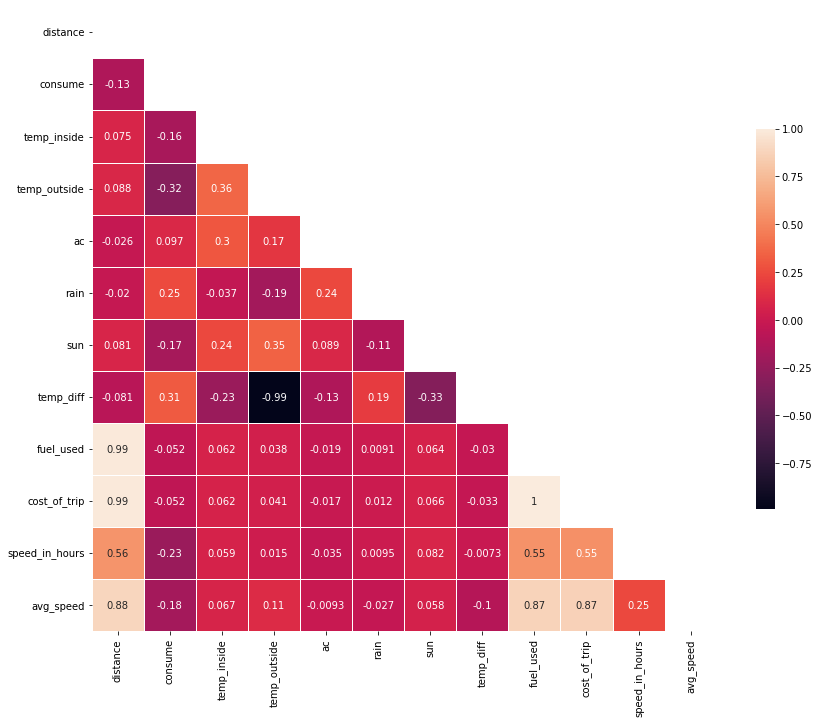

In [23]:
#triangle correlation matrix

#Set up mask for triangle representation
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = correlations)

plt.show()
#the lighter the more correlated they are
#the darker the low correlated

In [24]:
#There is a high correlation on the columns I created (fuel sued, cost of trip)
# Because they come from the other columns. So I can drop them.

In [25]:
data.drop(['temp_diff','cost_of_trip','fuel_used','avg_speed'],axis=1,inplace=True)
data

,distance,consume,temp_inside,temp_outside,gas_type,ac,rain,sun,speed_in_hours
0,28.0,5.0,21.5,12,E10,0,0,0,0.433333
1,12.0,4.2,21.5,13,E10,0,0,0,0.500000
2,11.2,5.5,21.5,15,E10,0,0,0,0.633333
3,12.9,3.9,21.5,14,E10,0,0,0,0.600000
4,18.5,4.5,21.5,15,E10,0,0,0,0.766667
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,24.5,18,SP98,0,0,0,0.650000
384,16.1,4.3,25.0,31,SP98,1,0,0,0.633333
385,16.0,3.8,25.0,19,SP98,0,0,0,0.750000
386,15.4,4.6,25.0,31,SP98,1,0,0,0.700000


### Regression

In [26]:
X = data.drop('consume',axis=1)
y = data['consume']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [28]:
X_train_n = X_train.select_dtypes(np.number)
X_train_c = X_train.select_dtypes(object)
X_test_n= X_test.select_dtypes(np.number)
X_test_c = X_test.select_dtypes(object)

In [29]:
X_train_n

,distance,temp_inside,temp_outside,ac,rain,sun,speed_in_hours
278,16.0,22.000000,11,0,0,0,0.683333
345,16.0,22.000000,15,0,0,0,0.700000
236,25.2,22.500000,9,0,0,0,0.916667
232,27.1,22.500000,8,0,0,0,1.150000
306,16.0,22.000000,10,0,0,0,0.666667
...,...,...,...,...,...,...,...
203,12.6,21.929521,17,0,0,0,0.550000
255,11.8,22.500000,8,0,0,0,0.550000
72,13.9,21.500000,6,0,0,0,0.483333
235,12.4,22.500000,1,0,0,0,0.633333


In [30]:
#NORMALISE DATA:
################
#If data is samely distributed, then we can normalize data, but only numerical columns:

In [31]:
transformer = MinMaxScaler().fit(X_train_n) # we fit only with train data
X_train_norm = transformer.transform(X_train_n)

X_train_n_scale = pd.DataFrame(X_train_norm, index = X_train_n.index, columns=X_train_n.columns)
X_train_n_scale.head()

,distance,temp_inside,temp_outside,ac,rain,sun,speed_in_hours
278,0.068436,0.461538,0.444444,0.0,0.0,0.0,0.355263
345,0.068436,0.461538,0.555556,0.0,0.0,0.0,0.368421
236,0.111266,0.538462,0.388889,0.0,0.0,0.0,0.539474
232,0.120112,0.538462,0.361111,0.0,0.0,0.0,0.723684
306,0.068436,0.461538,0.416667,0.0,0.0,0.0,0.342105


In [32]:
X_test_norm = transformer.transform(X_test_n)

X_test_n_scale = pd.DataFrame(X_test_norm, index = X_test_n.index, columns=X_test_n.columns)
X_test_n_scale.head()

,distance,temp_inside,temp_outside,ac,rain,sun,speed_in_hours
93,0.051676,0.450696,0.416667,0.0,0.0,0.0,0.381579
179,0.069367,0.307692,0.138889,0.0,0.0,0.0,0.197368
127,0.025605,0.769231,0.194444,0.0,0.0,0.0,0.421053
62,0.039572,0.384615,0.305556,0.0,0.0,0.0,0.131579
227,0.082402,0.538462,0.250000,0.0,1.0,0.0,0.513158


In [33]:
X_train_c['gas_type']=np.where(X_train_c['gas_type']=='E10',1,0)
X_train_c['gas_type']

278    0
345    1
236    1
232    0
306    0
      ..
203    0
255    1
72     0
235    1
37     1
Name: gas_type, Length: 310, dtype: int32

In [34]:
X_test_c['gas_type']=np.where(X_test_c['gas_type']=='E10',1,0)
X_test_c['gas_type']

93     0
179    1
127    0
62     0
227    0
      ..
78     0
303    0
162    1
270    1
188    1
Name: gas_type, Length: 78, dtype: int32

In [35]:
X_train_c

,gas_type
278,0
345,1
236,1
232,0
306,0
...,...
203,0
255,1
72,0
235,1


In [36]:
#Merge numeric columns with cathegorical columns:
X_train = pd.concat([X_train_n,X_train_c],axis = 1)
X_train #310 rows
X_test = pd.concat([X_test_n,X_test_c],axis = 1)
X_test #78 rows

,distance,temp_inside,temp_outside,ac,rain,sun,speed_in_hours,gas_type
93,12.4,21.929521,10,0,0,0,0.716667,0
179,16.2,21.000000,0,0,0,0,0.483333,1
127,6.8,24.000000,2,0,0,0,0.766667,0
62,9.8,21.500000,6,0,0,0,0.400000,0
227,19.0,22.500000,4,0,1,0,0.883333,0
...,...,...,...,...,...,...,...,...
78,12.4,21.500000,7,0,0,0,0.933333,0
303,29.9,22.000000,18,1,0,0,0.533333,0
162,53.2,21.500000,2,0,0,0,1.183333,1
270,16.0,22.000000,12,0,0,0,0.683333,1


### Linear Regression

In [37]:
# Create linear regression
regr = LinearRegression()
# Train the linear regression
model = regr.fit(X_train, y_train)
# Score the model
model.score(X_test, y_test) #this is the R^2
# model prediction
y_pred= regr.predict(X_test)

#The R score is 0.11 and it doesn't look very good. So let's take a look into other regressor models.

### KNeighborsRegressor

In [44]:
knn = KNeighborsRegressor(n_neighbors=3)
# training the model on normalized data
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.1105506384458298

In [46]:
knn = KNeighborsRegressor(n_neighbors=5)
# training the model on normalized data
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.1802682484450776

In [45]:
knn = KNeighborsRegressor(n_neighbors=10)
# training the model on normalized data
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.24439239314043737

In [47]:
knn = KNeighborsRegressor(n_neighbors=12)
# training the model on normalized data
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.09235635941866527

In [48]:
dtr = DecisionTreeRegressor()
# training the model on normalized data
dtr.fit(X_train, y_train)
dtr.score(X_test, y_test)

-0.07713505055930514

### Conclusion

In [49]:
# we should use the KNeighborsRegressor as our model (with 5-10 values we get a high value). It will probably give us the best outcome.